In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
cap = cv2.VideoCapture("12.avi")

In [61]:
while not cap.isOpened():
    cap = cv2.VideoCapture("12.avi")
    cv2.waitKey(1000)
    print("Wait for the header")

In [62]:
pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
fps = cap.get(cv2.CAP_PROP_FPS)

In [63]:
# https://www.pyimagesearch.com/2015/03/09/capturing-mouse-click-events-with-python-and-opencv/
refPt = []
cropping = False
title = "press 'n' for next, 'r' to reset, 'c' to stop"

In [64]:
def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping
    
    # if the left mouse button is pressed, record the starting (x, y)
    # coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
    
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x, y))
        cropping = False
        
        # draw a rectangle around the region of interest
        cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
        cv2.imshow(title , image)

In [65]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
 
# load the image, clone it, and setup the mouse callback function
flag, image = cap.read() 
clone = image.copy()
cv2.namedWindow(title)
cv2.setMouseCallback(title, click_and_crop)
 
# keep looping until the 'q' key is pressed
while True:

    # display the image and wait for a keypress
    cv2.imshow(title, image)
    key = cv2.waitKey(1) & 0xFF
 
    # if the 'n' key is pressed, give a frame after 1 sec
    # for reselecting ROI
    if key == ord("n"):
        if cap.get(cv2.CAP_PROP_POS_FRAMES) + fps >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
            print("No more frames!")
            break
        pos_frame = pos_frame + fps
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame)
        flag, image = cap.read()
        clone = image.copy()
        cv2.namedWindow(title)
        cv2.setMouseCallback(title, click_and_crop)
    
    
    # if the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()
 
    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break
 
# if there are two reference points, then crop the region of interest
# from teh image and display it
if len(refPt) == 2:
    roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
    cv2.imshow("ROI", roi)
    cv2.waitKey(0)
 
# close all open windows
cv2.destroyAllWindows()

In [66]:
ref_frame_pos = pos_frame

In [67]:
cap.set(cv2.CAP_PROP_POS_FRAMES, ref_frame_pos)

True

In [68]:
flag, frame = cap.read()
cv2.imwrite("ref_image.jpg", frame)

True

## Thresholding

In [69]:
img = cv2.imread("ref_image.jpg", 0)

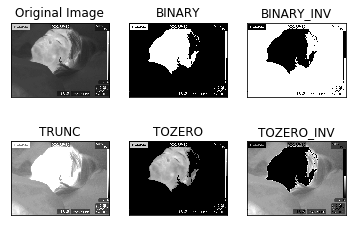

In [70]:
ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,100,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

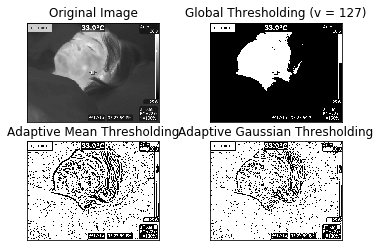

In [71]:

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

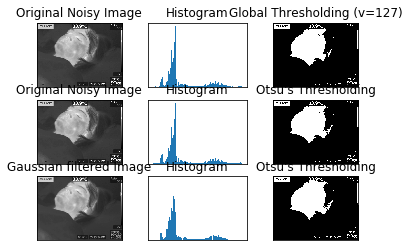

In [72]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Using plain binary thersholding

In [77]:
img = cv2.imread("ref_image.jpg")

In [78]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [85]:
ret1,th1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [87]:
M = cv2.moments(th1)

In [88]:
cX = int(M["m10"]/ M["m00"])
cY = int(M["m01"]/ M["m00"])

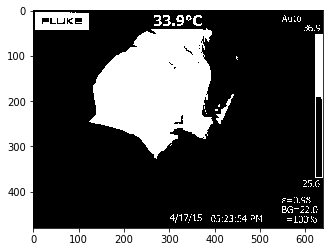

In [93]:
plt.imshow(th1, 'gray')

In [95]:
cv2.imshow("window", th1)

In [98]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', th1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [99]:
def calculateDistance(first, second):
    x = second[0] - first[0]
    y = second[1] - first[1]
    return (x**2.0 + y**2.0)**0.5

In [109]:
def centroid(image, threshold = 127):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY)
    Mom = cv2.moments(thresh1)
    X = int(Mom["m10"]/ Mom["m00"])
    Y = int(Mom["m01"]/ Mom["m00"])
    return (X,Y)

### Checking if tracking works properly

In [110]:
cap.set(cv2.CAP_PROP_POS_FRAMES, ref_frame_pos)
while True:
    flag, frame = cap.read()
    key = cv2.waitKey(100) & 0xFF
    if key == ord("q"):
        break
    if flag:
        pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        cX_new, cY_new = centroid(frame)
        newROI = [(refPt[0][0] + cX - cX_new, refPt[0][1] + cY - cY_new)];
        newROI.append(((refPt[1][0] + cX - cX_new), (refPt[1][1] + cY - cY_new)))
        cv2.rectangle(frame, newROI[0], newROI[1], (0, 0, 255), 2)
        cv2.imshow("ROI Tracking", frame)
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame-1)
        print("frame is not ready")
    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break
cv2.destroyAllWindows()

It is not as expected